# <font color='blue'>Chapter 7 Convolution</font>

## <font color='blue'>Problem</font>

### Audio AI: isolating vocals from stereo music using Convolutional Neural Networks 
https://vimeo.com/305275806 <br>
### How Convolution Works? 
https://www.youtube.com/watch?v=B-M5q51U8SM

### <font color='green'>Next: Correlation</font>

Smoothing is an operation that tries to remove short-term variations from a signal in order to reveal long-term trends. For example, if you plot daily
changes in the price of a stock, it would look noisy; a smoothing operator might make it easier to see whether the price was generally going up or
down over time. A common smoothing algorithm is a moving average, which computes the mean of the previous n values, for some value of n.

<div>
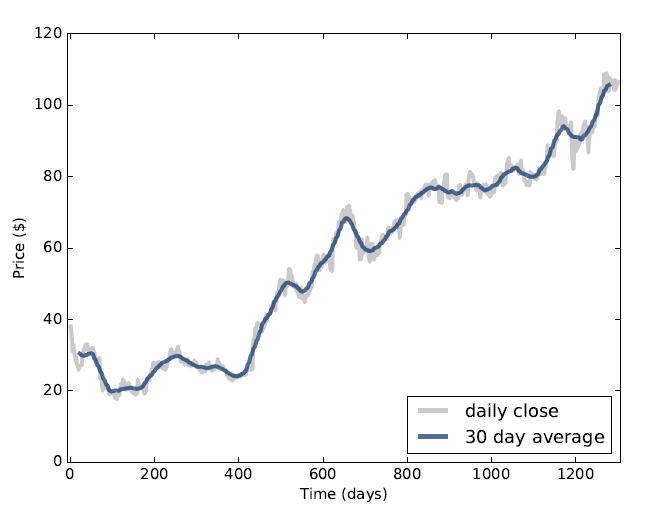
</div>

## <font color='blue'>7-1 Basic Concept</font>
We will discuss what is the convolution

### Convolution
Given two functions $x(t)$ and $h(t)$, the convolution can be defined as follows：

\begin{equation}
y(t)=\int_{-\infty}^{\infty} x(t) \cdot h(t - \tau)  d\tau      
\end{equation} 

or

\begin{equation}
y(t) =  x(t) \ast h(t)
\end{equation} 

where asterisk $\ast$ is the convolution symbol.


Let $x(t)=f(t)$ and $h(t)=g(t)$ in the following figures

<div>
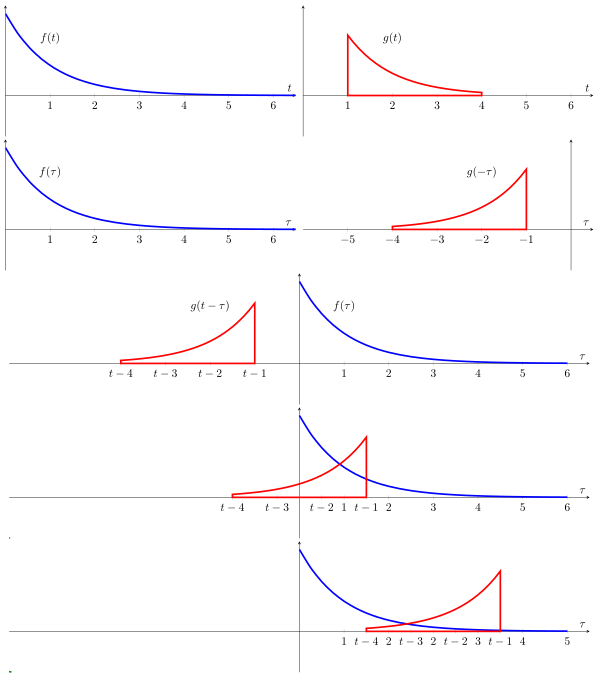
</div>
Source: https://en.wikipedia.org/wiki/Convolution

<div>
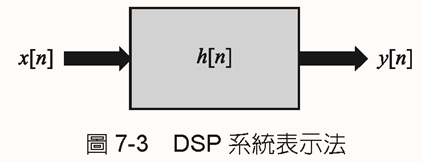
</div>

### Exampe
If the digial signal is：<br>
$x=\{ 1,2,4,3,2,1,1 \}, n=0, 1,...,6$ <br>
another digial processing function is<br>
$h=\{ 1,2,3,1,1\}, n=0,1,2,3,4$ <br>
Please find the convolution result. 
<div>
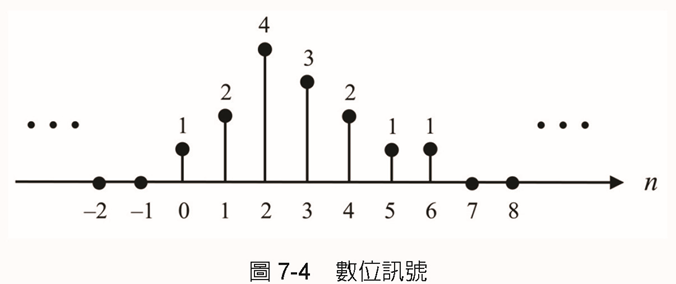
</div>

<div>
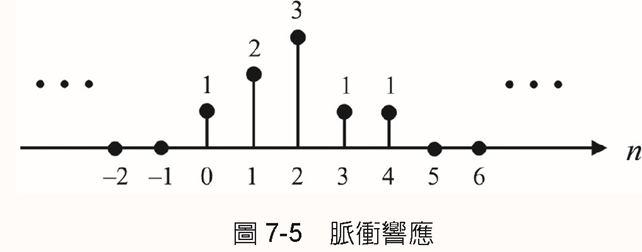
</div>

<div>
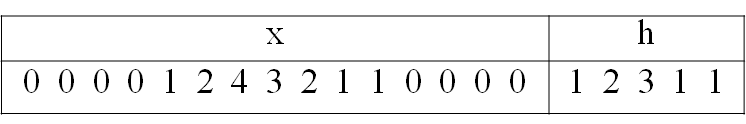
</div>

\begin{equation}
y[0] =\sum\limits_{k=-\infty}^{\infty} x[k] \cdot h[-k] = x[0] \cdot h[0]= 1  
\end{equation}

\begin{equation}
\begin{split}
y[1] &= \sum\limits_{k=-\infty}^{\infty} x[k] \cdot h[1-k] \\
     &= x[0] \cdot h[1] + x[1] \cdot h[0] \\
     &= 1 \cdot 2 + 2 \cdot 1 = 4      
\end{split}
\end{equation}

\begin{equation}
\begin{split}
y[2]&=\sum\limits_{k=-\infty}^{\infty} x[k] \cdot h[2-k] \\
    &= x[0] \cdot h[2] + x[1] \cdot h[1] + x[2] \cdot h[0] \\
    &= 1 \cdot 3 + 2 \cdot 2 + 4 \cdot 1 = 3 + 4 + 4 = 11   
\end{split}
\end{equation}

\begin{equation}
\begin{split}
y[3]&=\sum\limits_{k=-\infty}^{\infty} x[k] \cdot h[3-k] \\
    &= x[0] \cdot h[3] + x[1] \cdot h[2] + x[2] \cdot h[1] + x[3] \cdot h[0]\\
    &= 1 \cdot 1 + 2 \cdot 3 + 4 \cdot 2 + 3 \cdot 1 = 1 + 6 + 8 + 3 = 18     
\end{split}
\end{equation}

In [1]:
import numpy as np

x = np.array( [ 1, 2] )
h = np.array( [ 0.5, 0.3] )
y = np.convolve( x, h, 'full' )

print( "x =", x )
print( "h =", h )
print( "Full Convolution y =", y )

x = [1 2]
h = [0.5 0.3]
Full Convolution y = [0.5 1.3 0.6]


In [9]:
import numpy as np

x = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
h = np.array( [ 1, 2, 3, 1, 1 ] )
y = np.convolve( x, h, 'full' )
y1 = np.convolve( x, h, 'same' )

print( "x =", x )
print( "h =", h )
print( "Full Convolution y =", y )
print( "Convolution y =", y1 )

x = [1 2 4 3 2 1 1]
h = [1 2 3 1 1]
Full Convolution y = [ 1  4 11 18 23 20 16 10  6  2  1]
Convolution y = [11 18 23 20 16 10  6]


### LTI系統的連接方式，
分成串聯(Cascade Connection)或並聯(Parallel Connection)兩種。

<div>
<img src="attachment:image.png" width="400"/>
</div>

\begin{equation}
y[n]=h_2[n] \ast (h_1[n] \ast x[n]) = (h_2[n] \ast h_1[n]) \ast x[n] =  (h_1[n] \ast h_2[n]) \ast x[n] 
\end{equation} 

<div>
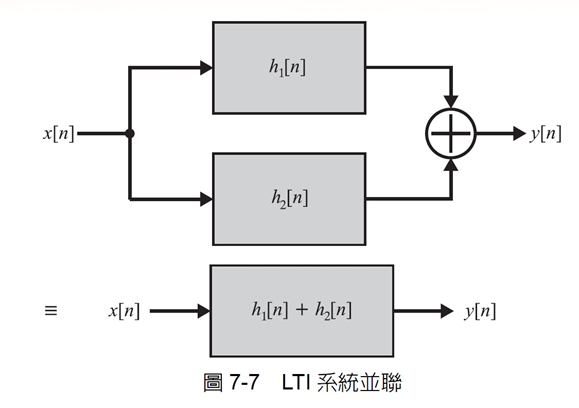
</div>

\begin{equation}
y[n]=h_1[n] \ast x[n] + h_2[n] \ast x[n] = (h_1[n] + h_2[n]) \ast x[n] 
\end{equation} 

## <font color='blue'>7-2 Filter</font>
We will discuss what is the filter

平均濾波器(Average Filters)可以定義為：

\begin{equation}
h[n]=\frac {1}{M} \{ 1,1,...,1 \}, n=0,1,...,M-1      
\end{equation} 
 
其中，$M$為濾波器大小(Filter Size)。

### Example
若輸入的數位訊號為：$x={1,2,4,3,2,1,1}, n=0,1,...,6$ <br>
若使用平均濾波器，濾波器大小為3，求輸出的數位訊號。

<div>
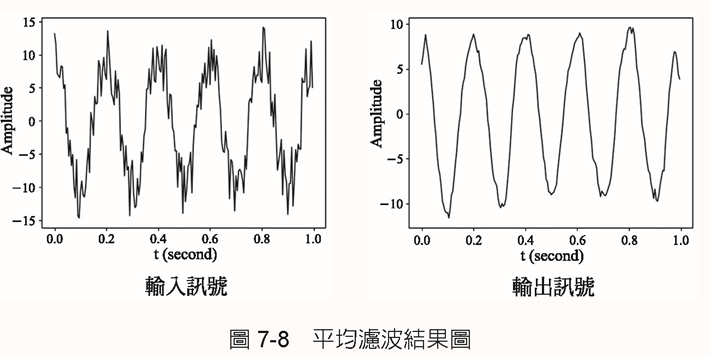
</div>

In [25]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 200, endpoint = False )		
x = 10 * np.cos( 2 * np.pi * 5 * t ) + random.uniform ( -5, 5, 200 )
h = np.ones(6) / 6
y = np.convolve( x, h, 'same' )

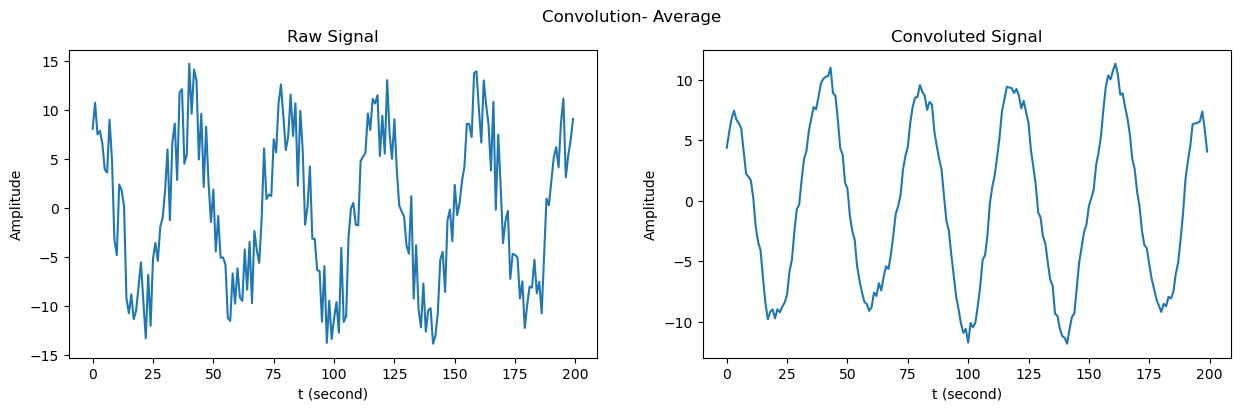

In [26]:
chart_no = 2 
no = [i for i in range(0, chart_no)]
title = ['Raw Signal', 'Convoluted Signal']
    
fig, axes = plt.subplots(1, chart_no, sharex=True, figsize=(15,4))
fig.suptitle('Convolution- Average')

for i, samples in zip(no, [x, y]):
    axes[i].plot(samples)
    axes[i].set_title(title[i])
    
for ax in axes.flat:
    ax.set(xlabel= 't (second)', ylabel='Amplitude')
    #ax.label_outer()

plt.show( )

### 高斯濾波器(Gaussian Filters)
可定義為：
 
\begin{equation}
g[n]=e ^ {{-n^2}/{2\sigma^2}}
\end{equation}     

其中，$n$為濾波器的索引，$\sigma$為標準差(Standard Deviation)。

<div>
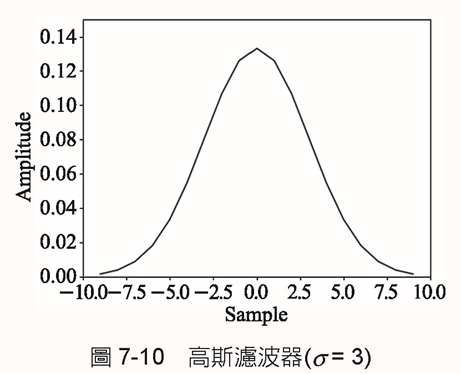
</div>
<div>
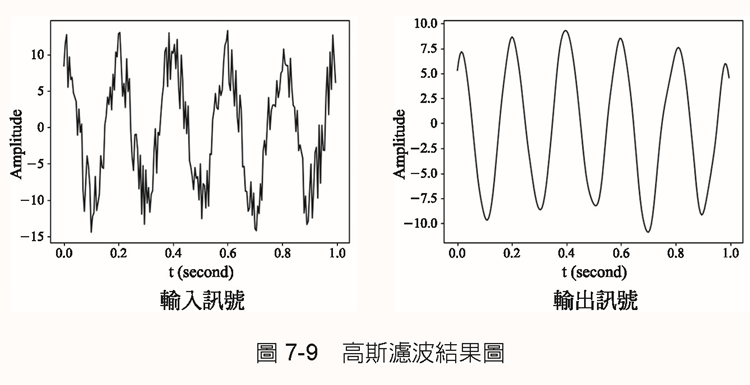
</div>

In [34]:
import numpy as np
import numpy.random as random
import scipy.signal as signal
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 200, endpoint = False )		
x = 10 * np.cos( 2 * np.pi * 5 * t ) + random.uniform( -5, 5, 200 )

sigma = 3                             			# 
filter_size = 3 * sigma + 1                		# 
gauss = signal.gaussian( filter_size, sigma )	# 
sum = np.sum( gauss )                   		# 
gauss = gauss / sum

y = np.convolve( x, gauss, 'same' )           

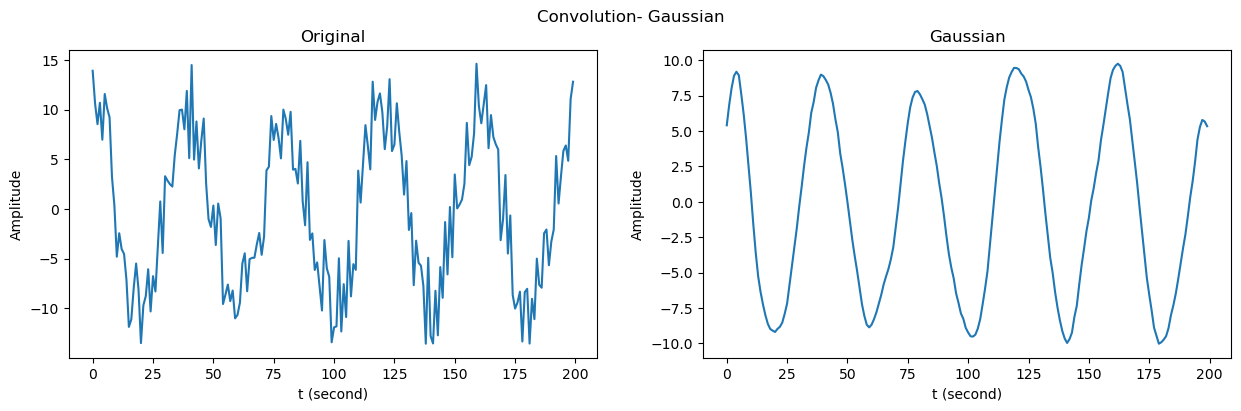

In [35]:
chart_no = 2 
no = [i for i in range(0, chart_no)]
title = ['Original', 'Gaussian']
    
fig, axes = plt.subplots(1, chart_no, sharex=True, figsize=(15,4))
fig.suptitle('Convolution- Gaussian')

for i, samples in zip(no, [x, y]):
    axes[i].plot(samples)
    axes[i].set_title(title[i])
    
for ax in axes.flat:
    ax.set(xlabel= 't (second)', ylabel='Amplitude')

plt.show( )

### Reference link: 摺積(捲積)與單位脈衝響應
https://www.youtube.com/watch?v=acAw5WGtzuk

<font color='red'> Advanced Application</font>
Audio AI: isolating vocals from stereo music using Convolutional Neural Networks <br>
<div>
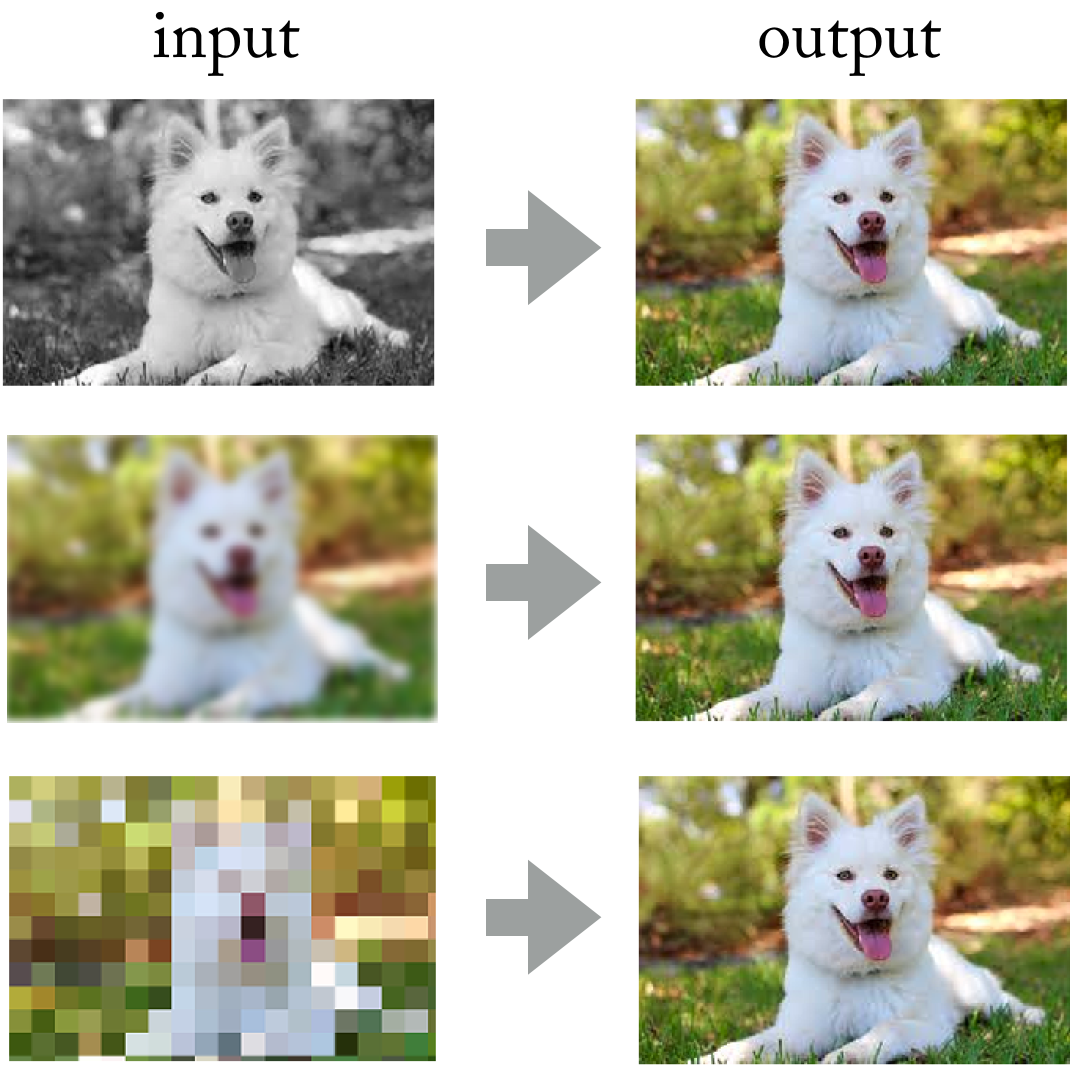
</div>
CNNs have been successful at tasks such as image colorization, deblurring and super-resolution. <br>
Reference: 
https://towardsdatascience.com/audio-ai-isolating-vocals-from-stereo-music-using-convolutional-neural-networks-210532383785

### Problem: 
Please speed up or slow down an audio clip. 